<a href="https://colab.research.google.com/github/Danny2611/LAB-ML/blob/master/Lab4_ML_21130584_LeQuocTrung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks.

*   **Deadline: 23:59, 01/04/2024**



# Import libraries

In [ ]:
# code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


#Task 1.
Apply **LogisticRegression** to iris dataset to classify species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'.



```
from sklearn import datasets
data1 = datasets.load_iris()
```




Accuracy: 0.9777777777777777


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


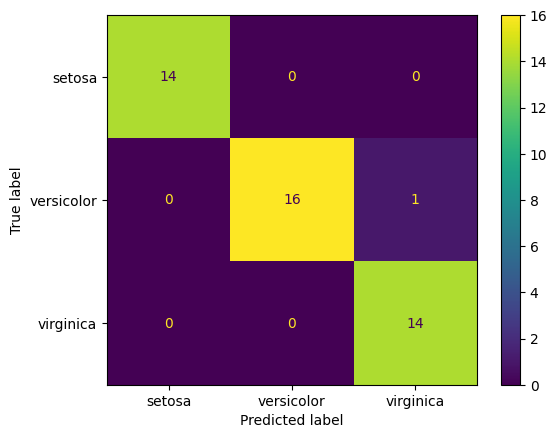

In [ ]:
#code
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


iris = datasets.load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()


#Task 2.
Apply LogisticRegression to **FASHION** dataset (*fashion_train.csv* and *fashion_test.csv*) which aims at classifying 10 fashion categories. Dataset includes 784 pixels values of images (28x28). This pixel-value is an integer between 0 and 255. Each training and test example is assigned to one of the following labels:

*   0 T-shirt/top
*   1 Trouser
*   2 Pullover
*   3 Dress
*   4 Coat
*   5 Sandal
*   6 Shirt
*   7 Sneaker
*   8 Bag
*   9 Ankle boot

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


drive.mount('/content/gdrive')


%cd '/content/gdrive/MyDrive/lab4-ML'


fashion_train = pd.read_csv('fashion_train.csv')
fashion_test = pd.read_csv('fashion_test.csv')


X_train = fashion_train.drop('y', axis=1) / 255.0
y_train = fashion_train['y']
X_test = fashion_test.drop('y', axis=1) / 255.0
y_test = fashion_test['y']


X_train = X_train.values.reshape(-1, 28, 28)
X_test = X_test.values.reshape(-1, 28, 28)


model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train.reshape(-1, 28 * 28), y_train)


y_pred = model.predict(X_test.reshape(-1, 28 * 28))


accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/lab4-ML
Accuracy: 0.802


#Task 3.
Apply another classification algorithm named **kNN**, which is an instance classifcation model.
*  3.1. Perform kNN algorithm to Iris dataset with k={3, 5, …, 29}. Select the best value of k. Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: **accuracy, precision, recall, f1 measure**) using **PrettyTable**.


k=3: Accuracy=1.0, Precision=1.0, Recall=1.0, F1=1.0
k=5: Accuracy=1.0, Precision=1.0, Recall=1.0, F1=1.0
k=7: Accuracy=1.0, Precision=1.0, Recall=1.0, F1=1.0
k=9: Accuracy=1.0, Precision=1.0, Recall=1.0, F1=1.0
k=11: Accuracy=1.0, Precision=1.0, Recall=1.0, F1=1.0
k=13: Accuracy=1.0, Precision=1.0, Recall=1.0, F1=1.0
k=15: Accuracy=1.0, Precision=1.0, Recall=1.0, F1=1.0
k=17: Accuracy=1.0, Precision=1.0, Recall=1.0, F1=1.0
k=19: Accuracy=1.0, Precision=1.0, Recall=1.0, F1=1.0
k=21: Accuracy=1.0, Precision=1.0, Recall=1.0, F1=1.0
k=23: Accuracy=1.0, Precision=1.0, Recall=1.0, F1=1.0
k=25: Accuracy=1.0, Precision=1.0, Recall=1.0, F1=1.0
k=27: Accuracy=1.0, Precision=1.0, Recall=1.0, F1=1.0
k=29: Accuracy=0.9666666666666667, Precision=0.9666666666666667, Recall=0.9696969696969697, F1=0.9665831244778613
Best k: 3


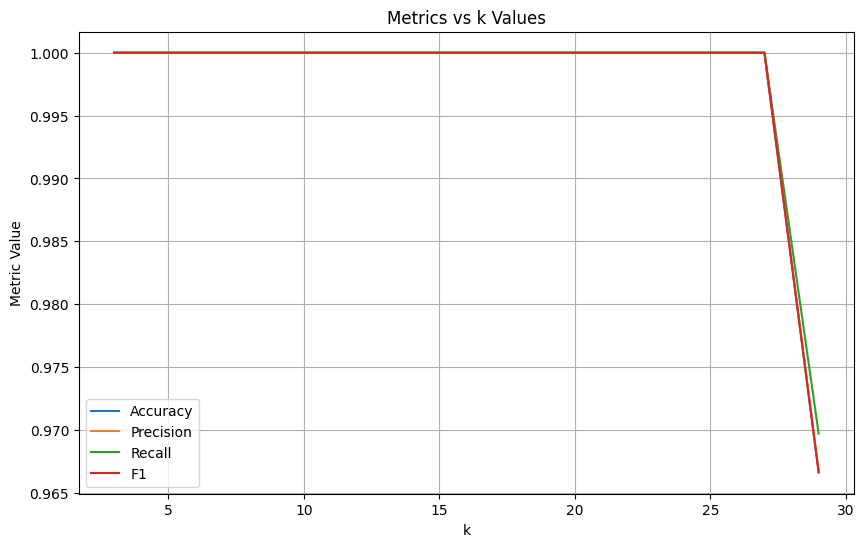

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from prettytable import PrettyTable


iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


k_values = np.arange(3, 30, 2)


k_metrics = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}


for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)


    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    recall = metrics.recall_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')


    k_metrics['accuracy'].append(accuracy)
    k_metrics['precision'].append(precision)
    k_metrics['recall'].append(recall)
    k_metrics['f1'].append(f1)


    print(f"k={k}: Accuracy={accuracy}, Precision={precision}, Recall={recall}, F1={f1}")


best_k = k_values[np.argmax(k_metrics['accuracy'])]
print(f"Best k: {best_k}")


plt.figure(figsize=(10, 6))
plt.plot(k_values, k_metrics['accuracy'], label='Accuracy')
plt.plot(k_values, k_metrics['precision'], label='Precision')
plt.plot(k_values, k_metrics['recall'], label='Recall')
plt.plot(k_values, k_metrics['f1'], label='F1')
plt.title('Metrics vs k Values')
plt.xlabel('k')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()


#Task 4.
Similar to Task 3, apply kNN algorithm to **FASHION** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={3, 5, …, 29}. Select the best value of k. Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.
*  4.2.	Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.
*  4.3.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


Best value of k: 15


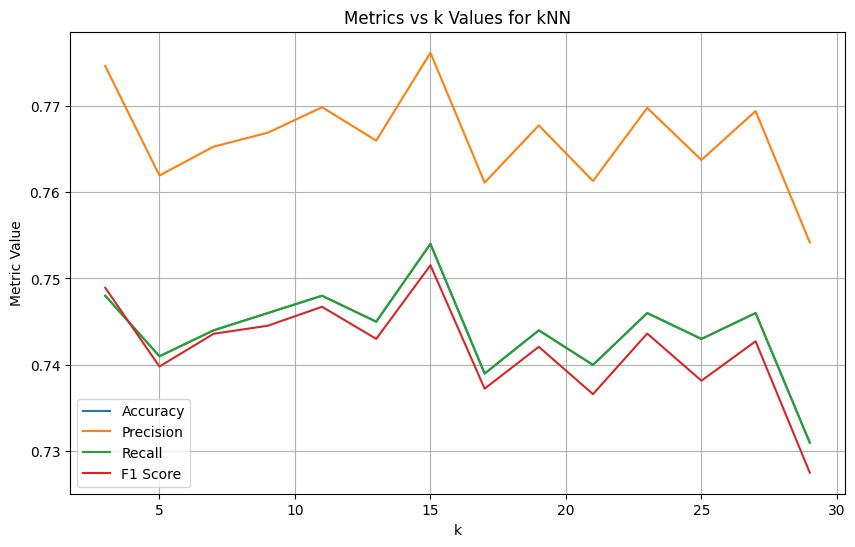


kNN Metrics:
Best k: 15
Accuracy: 0.754
Precision: 0.7761122161339781
Recall: 0.754
F1 Score: 0.751525948372566

Logistic Regression Metrics:
Accuracy: 0.79
Precision: 0.7932880135660527
Recall: 0.79
F1 Score: 0.7901312553193672


In [ ]:
# code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


train_data = pd.read_csv('fashion_train.csv')
test_data = pd.read_csv('fashion_test.csv')


X_train = train_data.drop('y', axis=1)
y_train = train_data['y']
X_test = test_data.drop('y', axis=1)
y_test = test_data['y']


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


k_values = np.arange(3, 30, 2)


accuracies = []
precisions = []
recalls = []
f1_scores = []

knn_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}


for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)


    y_pred = knn.predict(X_test_scaled)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    knn_metrics['Accuracy'].append(accuracy)
    knn_metrics['Precision'].append(precision)
    knn_metrics['Recall'].append(recall)
    knn_metrics['F1 Score'].append(f1)


best_k = k_values[np.argmax(accuracies)]
print("Best value of k:", best_k)


plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, label='Accuracy')
plt.plot(k_values, precisions, label='Precision')
plt.plot(k_values, recalls, label='Recall')
plt.plot(k_values, f1_scores, label='F1 Score')
plt.title('Metrics vs k Values for kNN')
plt.xlabel('k')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()


logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train_scaled, y_train)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')

print("\nkNN Metrics:")
print("Best k:", best_k)
print("Accuracy:", max(accuracies))
print("Precision:", precisions[np.argmax(accuracies)])
print("Recall:", recalls[np.argmax(accuracies)])
print("F1 Score:", f1_scores[np.argmax(accuracies)])

print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)


#Task 5.
Compare the performance of selected classification algorithms (**Decision Tree, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered **spam (1) or not (0)**, i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:
*  **48 continuous real [0,100] attributes** of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  **6 continuous real [0,100] attributes** of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  **1 continuous real [1,...] attribute** of type capital_run_length_average
= average length of uninterrupted sequences of capital letters
*  **1 continuous integer [1,...] attribute** of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters
*  **1 continuous integer [1,...] attribute** of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  **1 nominal {0,1} class attribute** of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


spambase = pd.read_csv("/content/gdrive/MyDrive/lab4-ML/spambase.csv")


X = spambase.iloc[:, :-1].values
y = spambase.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression(random_state=42)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
lr.fit(X_train, y_train)


dt_pred = dt.predict(X_test)
knn_pred = knn.predict(X_test)
lr_pred = lr.predict(X_test)


print("Decision Tree:")
print(classification_report(y_test, dt_pred))
print("kNN:")
print(classification_report(y_test, knn_pred))
print("Logistic Regression:")
print(classification_report(y_test, lr_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       531
           1       0.92      0.88      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921

kNN:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       531
           1       0.77      0.71      0.74       390

    accuracy                           0.79       921
   macro avg       0.79      0.78      0.78       921
weighted avg       0.79      0.79      0.79       921

Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       531
           1       0.92      0.90      0.91       390

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93

In [ ]:
from prettytable import PrettyTable

# These 3 are the columns of the tables
t = PrettyTable(['Subject Code', 'Subject', 'Marks'])

# To insert rows:
t.add_row(['K01', 'Maths', 95])
t.add_row(['K04', 'Physics', 89])
t.add_row(['K03', 'Chemistry', 92])
t.add_row(['K08', 'English', 91])
t.add_row(['K29', 'Computer Science', 99])
t.add_row(['K06', 'Social Science', 86])

print(t)

+--------------+------------------+-------+
| Subject Code |     Subject      | Marks |
+--------------+------------------+-------+
|     K01      |      Maths       |   95  |
|     K04      |     Physics      |   89  |
|     K03      |    Chemistry     |   92  |
|     K08      |     English      |   91  |
|     K29      | Computer Science |   99  |
|     K06      |  Social Science  |   86  |
+--------------+------------------+-------+


#Finally,
Save a copy in your Github. Remember renaming the notebook.